In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch,torch.utils.data
import gzip
import pickle
import random

#### Loading data

Using part of the code from the 'lecture_data' script

In [2]:
data = pickle.load(gzip.open('mnist.pkl.gz'),encoding='latin1')
train_data = data[0][0]
train_data_label = data[0][1]
val_data, val_data_label = zip(*random.sample(list(zip(data[0][0], data[0][1])), 200))
test_data = data[1][0]
test_data_label = data[1][1]

#### Visualise some data

Visualising some images with the corresponding label to check if all is good

In [3]:
def display_img(img, lab):
    lab = np.argmax(lab)
    plt.figure()
    plt.imshow(img.reshape((28, 28)), interpolation='nearest', cmap='binary')
    plt.title('label: ' + str(lab))

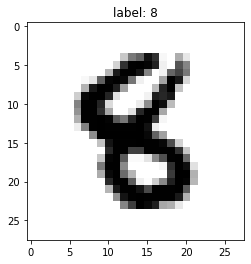

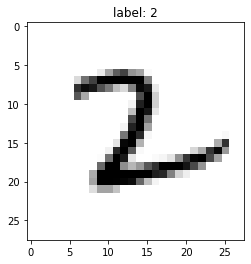

In [4]:
for i in range(2):
    display_img(test_data[i], test_data_label[i])

#### Parameters

Parameters of the network

In [5]:
learning_rate = .00005
nb_steps = 63000                                         # 63000 max
hist_interval = 50
loss_h = []
acc_h = []
nb_neurons = len(train_data_label[0])                    # 10
nb_entries = len(train_data[0]) + 1                      # 785
w = np.zeros((nb_neurons, nb_entries))                   # w: (10, 785)

#### Perceptron implementation

We define the 'fit' function that we can call to fit the network to the training data.

We can then call predict to check the accuracy on the test data.

In [6]:
def predict():
    accuracy = 0
    # For each test item
    for x, t in zip(test_data, test_data_label):
        # Add the bias to the input image
        x = np.append(x, [1], 0)
        # Compute the output of each neuron
        y = np.dot(w, x)
        # Compare the desired output with the predicted one 
        accuracy += np.argmax(y) == np.argmax(t)
    # Return the accuracy of the network on the test set
    return accuracy / len(test_data)

def val():
    accuracy = 0
    # For each test item
    for x, t in zip(val_data, val_data_label):
        # Add the bias to the input image
        x = np.append(x, [1], 0)
        # Compute the output of each neuron
        y = np.dot(w, x)
        # Compare the desired output with the predicted one 
        accuracy += np.argmax(y) == np.argmax(t)
    # Return the accuracy of the network on the test set
    return accuracy / len(val_data)

def fit():
    global w
    i = 0
    cumul_loss = .0
    # For each training item, x is the image and t is the corresponding label
    for x, t in zip(train_data, train_data_label):
        # Add the bias to the input image
        x = np.append(x, [1], 0)
        # Compute the output of each neuron
        y = np.dot(w, x)                                 # w: (10, 785), x: (785,), y: (10,)
        # Create a matrix containing the input image by the number of neurons
        # The matrix is transposed so we can multiply it to a (10,) vector
        m = np.transpose([x] * nb_neurons)               # m: (785, 10)
        # Compute the delta that will be add to the weights
        dw = learning_rate * m * (t - y)                 # m: (785, 10), (t - y): (10,), dw: (785, 10)
        # Add the delta to the weights
        w += np.transpose(dw)                            # w: (10, 785)
        i += 1
        cumul_loss += ((t - y)**2).mean(axis=0)
        if i % hist_interval == hist_interval - 1:
            acc_h.append(val())
        if i % 10 == 10 - 1:
            loss_h.append(cumul_loss / 10)
            cumul_loss = .0
        if i >= nb_steps:
            break

In [7]:
fit()

In [8]:
acc = predict()
print('Accuracy: ' + str(acc))

Accuracy: 0.8431428571428572


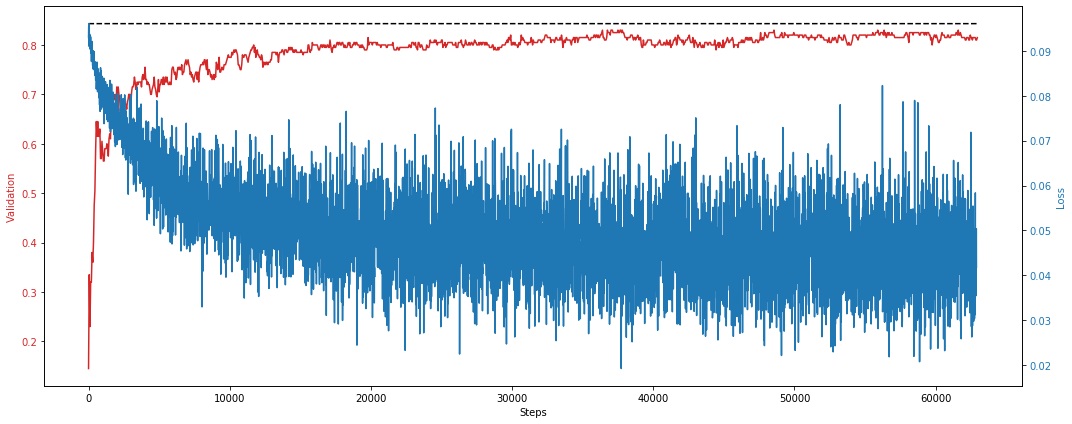

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Validation', color=color)
ax1.plot([i * hist_interval for i in range(len(acc_h))], acc_h, '-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.plot([i * 10 for i in range(len(loss_h[10:]))], loss_h[10:], '-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.plot([acc] * len(acc_h) * hist_interval, 'k--')
plt.gcf().set_size_inches(15, 6)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Same network with biases out from the input image

In [10]:
learning_rate = .001
nb_steps = 3000                                          # 63000 max
hist_interval = 5
loss_h = []
acc_h = []
nb_neurons = len(train_data_label[0])                    # 10
nb_entries = len(train_data[0])                          # 784
# Weights
w = np.zeros((nb_neurons, nb_entries))                   # w: (10, 785)
# Biases
b = np.zeros((nb_neurons))                               # b: (10)

In [11]:
def predict():
    accuracy = 0
    # For each test item
    for x, t in zip(test_data, test_data_label):
        # Compute the output of each neuron
        y = np.dot(w, x) + b
        # Compare the desired output with the predicted one 
        accuracy += np.argmax(y) == np.argmax(t)
    # Return the accuracy of the network on the test set
    return accuracy / len(test_data)

def val():
    accuracy = 0
    # For each test item
    for x, t in zip(val_data, val_data_label):
        # Compute the output of each neuron
        y = np.dot(w, x) + b
        # Compare the desired output with the predicted one 
        accuracy += np.argmax(y) == np.argmax(t)
    # Return the accuracy of the network on the test set
    return accuracy / len(val_data)

def fit():
    global w, b
    i = 0
    cumul_loss = .0
    # For each training item, x is the image and t is the corresponding label
    for x, t in zip(train_data, train_data_label):
        # Compute the output of each neuron
        y = np.dot(w, x) + b                             # w: (10, 785), x: (785,), y: (10,)
        # Create a matrix containing the input image by the number of neurons
        # The matrix is transposed so we can multiply it to a (10,) vector
        m = np.transpose([x] * nb_neurons)               # m: (785, 10)
        # Compute the delta that will be add to the weights
        dw = learning_rate * m * (t - y)                 # m: (785, 10), (t - y): (10,), dw: (785, 10)
        db = learning_rate * (t - y)                     # (t - y): (10,), db: (10,)
        # Add the delta to the weights and biases
        w += np.transpose(dw)                            # w: (10, 785)
        b += db                                          # b: (10,)
        i += 1
        cumul_loss += ((t - y)**2).mean(axis=0)
        if i % hist_interval == hist_interval - 1:
            acc_h.append(val())
        if i % 10 == 10 - 1:
            loss_h.append(cumul_loss / 10)
            cumul_loss = .0
        if i >= nb_steps:
            break

In [12]:
fit()

In [13]:
acc = predict()
print('Accuracy: ' + str(acc))

Accuracy: 0.8222857142857143


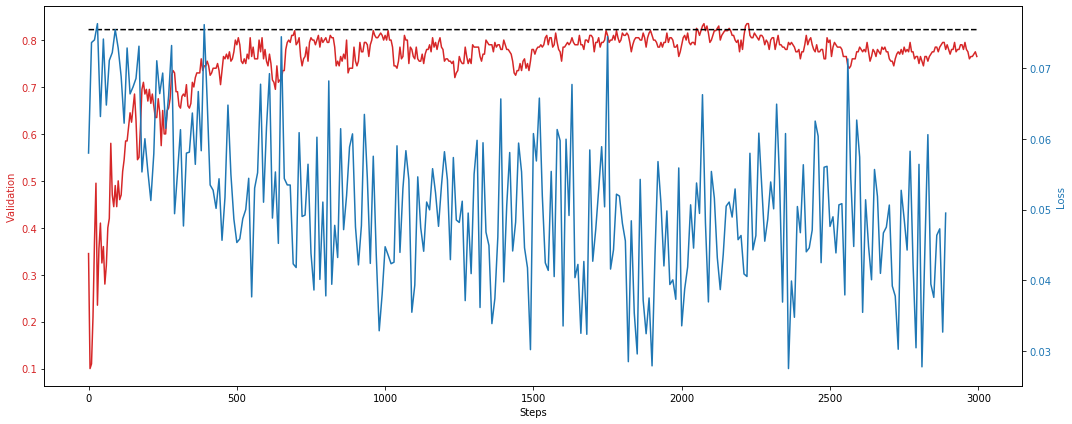

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Validation', color=color)
ax1.plot([i * hist_interval for i in range(len(acc_h))], acc_h, '-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.plot([i * 10 for i in range(len(loss_h[10:]))], loss_h[10:], '-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.plot([acc] * len(acc_h) * hist_interval, 'k--')
plt.gcf().set_size_inches(15, 6)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()